# <h1><center>Converting CSV to Geospatial fileformat</center></h1>

## 1 - Reading CSV with Pandas and Converting to GeoDataFrame

Comma-separated values (CSV)are predominantly the most used files in data science. Many datasets, however, have geographic component (Latitude/Longitude) that could be easily converted into geometry and could further be used for spatial data analysis.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading a csv file into pandas dataframe
df = pd.read_csv("data/acled2019.csv")
df.head(2)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,Habban,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,Habban,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM


In [3]:
# filtering the dataframe on country 

df = df[df['country']=="India"]

In [4]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [5]:
# checking the type of file

type(df)

pandas.core.frame.DataFrame

<AxesSubplot:>

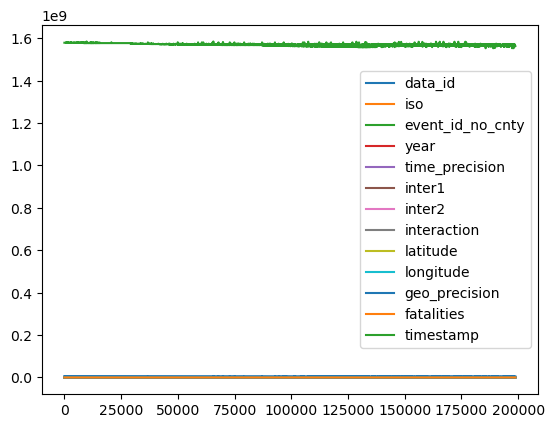

In [6]:
df.plot()

### Its hard for pandas to plot the geometry from a csv format 

# Let's Convert the file format

* We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects and set it as a geometry while creating the GeoDataFrame.

* What we are interested in is the latitude and longitude columns of the dataset. 

In [7]:
gdf = gpd.GeoDataFrame( df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.head(3)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
6,6714375,356,IND68961,68961,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,25.2905,79.8753,1,Amar Ujala,Subnational,"On Dec 31, protests were held by auto drivers ...",0,1578514386,IND,POINT (79.87530 25.29050)
7,6714634,356,IND68962,68962,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,31.3255,75.5791,1,Chandigarh Tribune,Subnational,"On Dec 31, protests were held by the Sikh comm...",0,1578514387,IND,POINT (75.57910 31.32550)


In [8]:
# lets verify the type 
type(gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

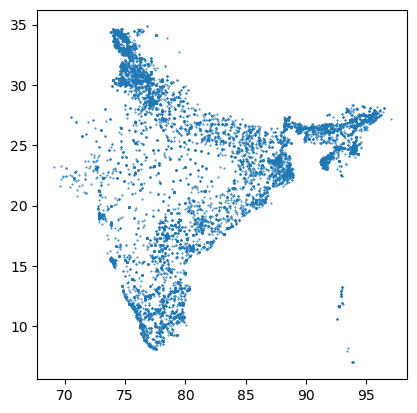

In [9]:
gdf.plot(markersize=.2)

<AxesSubplot:>

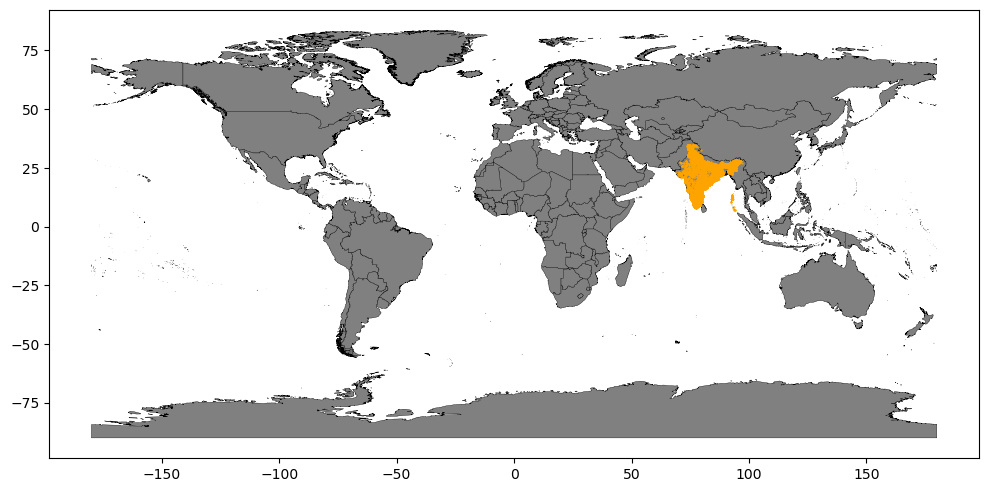

In [10]:
country = gpd.read_file("data/countries.shp")
fig , ax = plt.subplots(1,1,figsize=(12,6))
                        
country.plot( ax=ax ,edgecolor='black',linewidth=.25,color="grey")
gdf.plot(ax=ax ,color="orange",markersize = .2)

# Let's Save geodataframe into geospatial fileformat 
So we can use it later

* Write to Shapefile 

In [11]:
gdf.to_file("Events_in_India.shp", crs={'init' :'epsg:4326'})

* Write to GeoJSON

In [12]:
gdf.to_file("Events_in_India_Geojson.geojson", driver='GeoJSON')